## **Sales Data Analysis**

### Installing Required Libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

#### Sales Dataset

Variables

-Date: The date the transaction occurred.

-Gender: The gender of the customer (e.g., Male or Female).

-Age: The age of the customer.

-Product Category: The category of the product purchased (e.g., Beauty, Clothing, Electronics).

-Quantity: The number of units purchased.

-Price per Unit: Price of a single unit of the product.

-Total Amount: Total amount spent for that transaction (Quantity × Price per Unit).

#### Importing Data

In [268]:
df=pd.read_csv('../dataset/raw/Sales Dataset.csv')
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


Let's verify the column names and the data type of each variable

In [269]:
df.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [270]:
df.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

#### Cleaning Data

drop column Unnamed: 0, because it is not useful 

In [271]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


Tranform the colummn Date to datetime

In [272]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [273]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 163.6 KB


Here we can see that the dataframe uses 163.6 kb of memory

Here we can see that there is no missing data in the data frame.

### Optimizing data

Convert columns to smaller types

In [274]:
df['Age']=df['Age'].astype('int8')
df['Quantity']=df['Quantity'].astype('int8')
df['Price per Unit']=df['Price per Unit'].astype('float32')
df['Total Amount']=df['Total Amount'].astype('float32')

Getting dummy variables

In [275]:
dummy_variables=pd.get_dummies(df['Gender'])
df=pd.concat([df,dummy_variables], axis=1)
df.drop(columns=['Gender'], inplace=True)

Change index

In [276]:
#df.set_index('Date', inplace=True)
df.set_index('Date', inplace=True)
df 

,Age,Product Category,Quantity,Price per Unit,Total Amount,Female,Male
Date,,,,,,,
2023-11-24,34,Beauty,3,50.0,150.0,False,True
2023-02-27,26,Clothing,2,500.0,1000.0,True,False
2023-01-13,50,Electronics,1,30.0,30.0,False,True
2023-05-21,37,Clothing,1,500.0,500.0,False,True
2023-05-06,30,Beauty,2,50.0,100.0,False,True
...,...,...,...,...,...,...,...
2023-05-16,62,Clothing,1,50.0,50.0,False,True
2023-11-17,52,Beauty,3,30.0,90.0,False,True
2023-10-29,23,Beauty,4,25.0,100.0,True,False


In [277]:
df.info(memory_usage='deep')
#saving data
df.to_csv("../dataset/processed/Sales Data.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int8   
 1   Product Category  1000 non-null   object 
 2   Quantity          1000 non-null   int8   
 3   Price per Unit    1000 non-null   float32
 4   Total Amount      1000 non-null   float32
 5   Female            1000 non-null   bool   
 6   Male              1000 non-null   bool   
dtypes: bool(2), float32(2), int8(2), object(1)
memory usage: 83.4 KB


If we check the memory used again, we can see that it was reduced to 83.4 kb, which is a 49% reduction in memory.

### Display of data

Display a barplot with the total the product sales in the Online Store

#### Total of sales by product category 

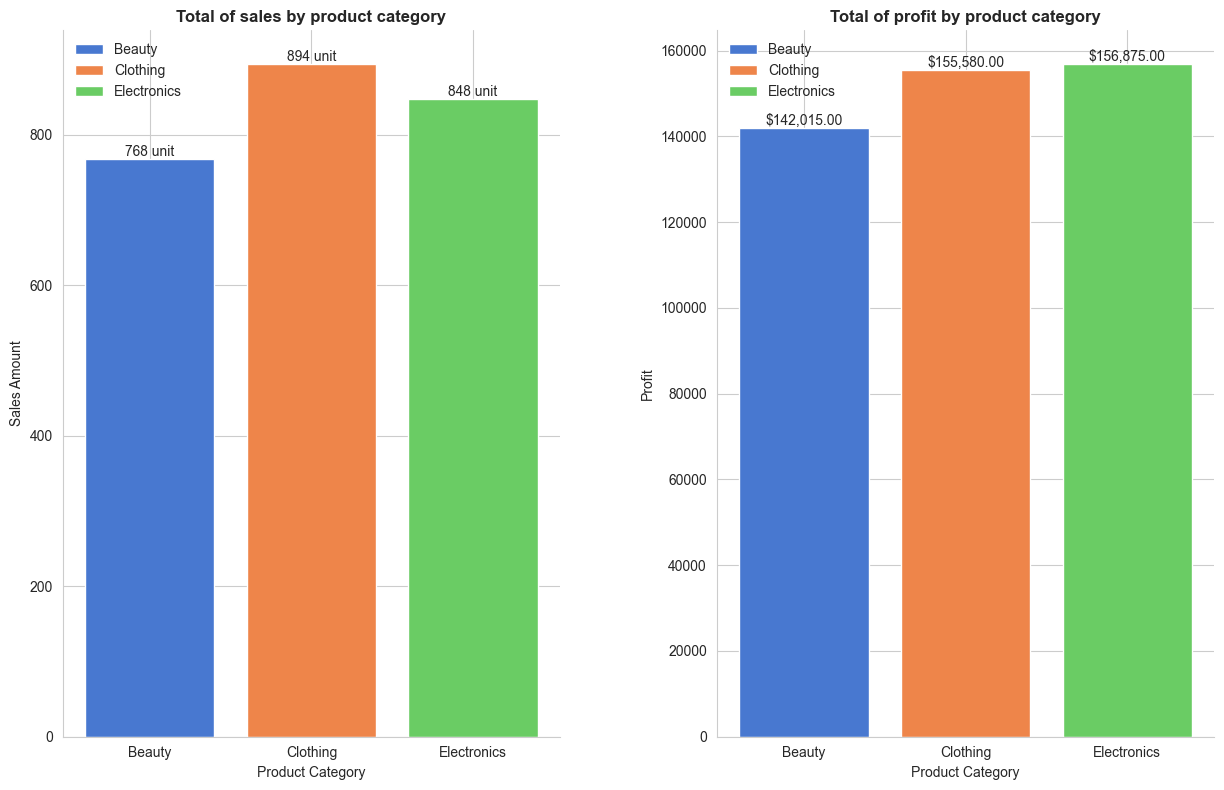

In [278]:
# data of all 2023
df_2023=df[df.index.year==2023]

#group sales by category type
df_sales=df_2023[["Product Category", 'Quantity','Total Amount']].groupby("Product Category").sum().reset_index()
fig, ax =plt.subplots(1, 2,figsize=(13, 8))
#adding style
colors = sns.color_palette("muted", n_colors=len(df_sales))
list_data=[
    {
        'col_y':'Quantity',
        'title':'Total of sales by product category',
        'label_y': 'Sales Amount'
    },
        {
        'col_y':'Total Amount',
        'title':'Total of profit by product category',
        'label_y': 'Profit'
    }
]
sns.set_style("whitegrid")
for index, values in enumerate(list_data):
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    #bar plot
    bar=ax[index].bar(df_sales['Product Category'],df_sales[values['col_y']],color=colors, label=df_sales['Product Category'])
    
    #setting labels and some data for better read
    ax[index].set_title(values['title'], fontsize=12,fontweight='bold')
    ax[index].set_xlabel("Product Category")
    ax[index].set_ylabel(values['label_y'])
    ax[index].legend(loc='upper left',fontsize=10, title_fontsize=11, frameon=False)
    #style for bar value name
    if values['label_y']=='Profit':
        labels = [f"${v:,.2f}" for v in df_sales['Total Amount']]
    else:
        labels = [f"{v} unit" for v in df_sales['Quantity']]
    ax[index].bar_label(bar,labels=labels)


#Increase horizontal space between subplots
plt.subplots_adjust(wspace=15)

plt.tight_layout()
plt.show()

The bar chart shows the total number of products sold grouped by category. It can be seen that the Clothing category represents the highest sales volume, suggesting greater demand or turnover for this type of product compared to other categories such as Electronics or Beauty.

This information can be useful for prioritizing sales strategies, managing inventory, or even adjusting marketing campaigns focused on the most impactful categories.

#### Trading of Sales in a 2023 

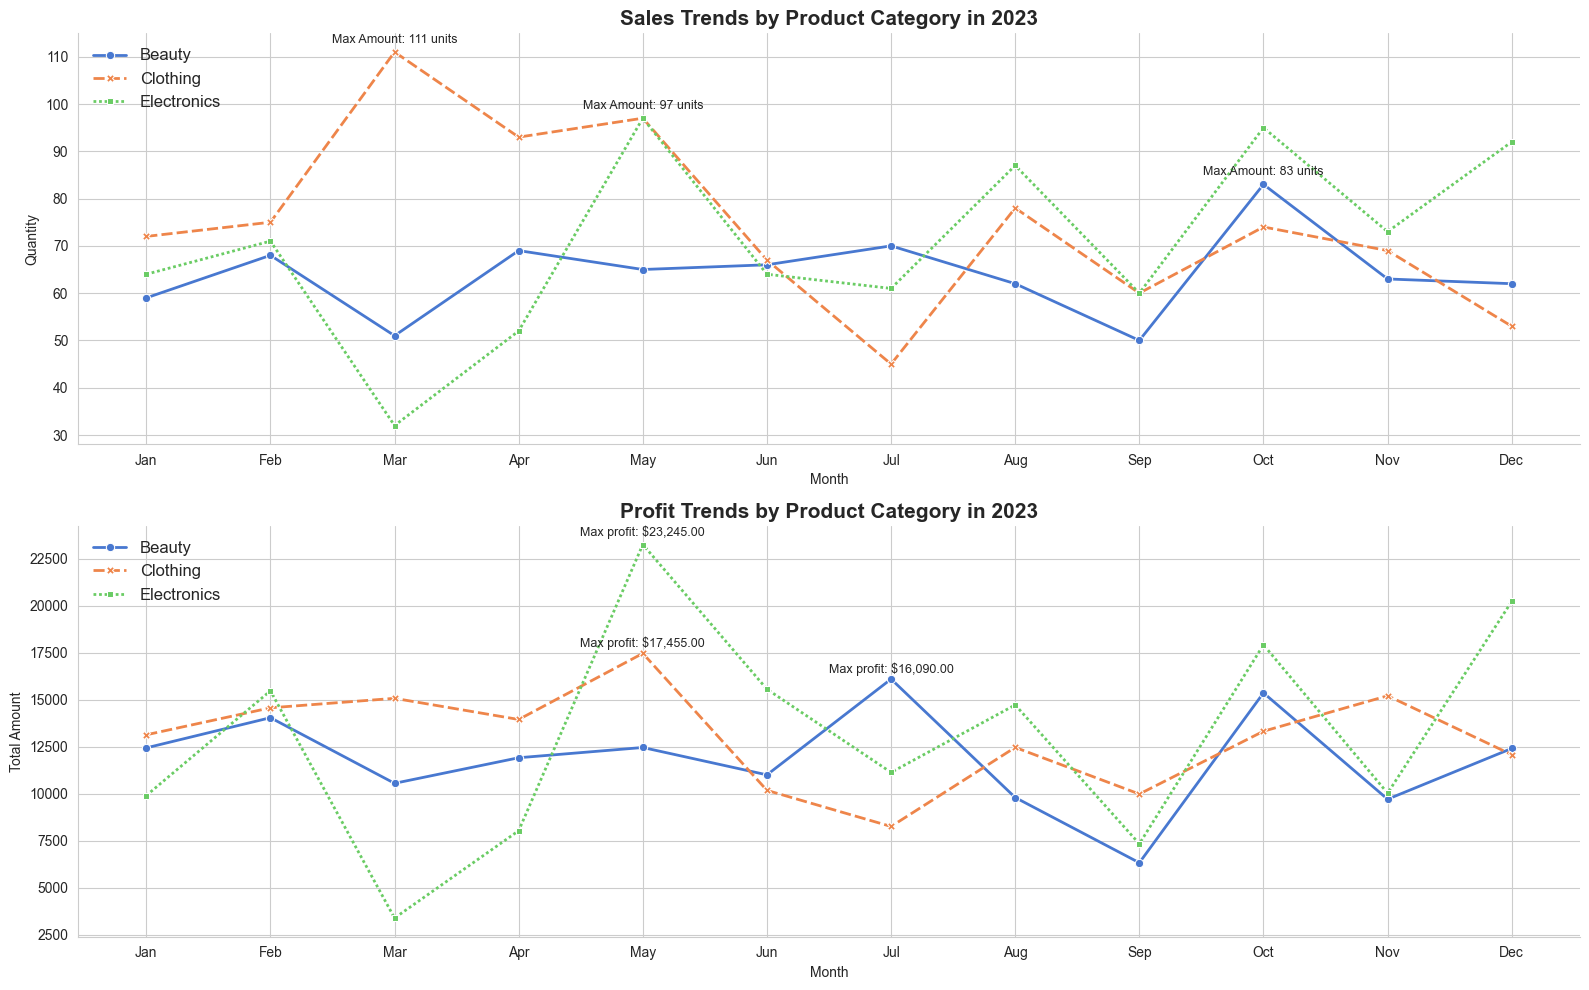

In [ ]:
# data of all 2023
df_2023=df[df.index.year==2023].copy()
#Collecting the months
df_2023['Month']=df_2023.index.month
df_2023.reset_index(inplace=True)
df_2023.drop(columns='Date', inplace=True)
#Grouping sales by month and product type
df_2023=df_2023[['Month','Product Category', 'Quantity', 'Total Amount']].groupby(['Month', 'Product Category']).sum().reset_index()
df_2023['Month']=pd.to_datetime(df_2023['Month'], format='%m').dt.strftime('%b')
#colors
colors=sns.color_palette('muted', n_colors=len(df_2023['Product Category'].unique()))
fig, ax = plt.subplots(2,1,figsize=(16,10))
list_data=[
    {
    'axis_y':'Quantity',
    'title':"Sales Trends by Product Category in 2023",
    },
    {
    'axis_y':'Total Amount',
    'title':"Profit Trends by Product Category in 2023"
    }
]
for index, values in enumerate(list_data):
    #Line plot
    sns.lineplot(data=df_2023, x='Month', y=values['axis_y'], hue='Product Category',style='Product Category',markers=True, palette=colors, linewidth=2, ax=ax[index],)
    #set title
    ax[index].set_title(values['title'], fontsize=15, fontweight='bold')
    #highlighting the greatest values ​​of each product
    for line in df_2023['Product Category'].unique():
        sub = df_2023[df_2023['Product Category'] == line]
        df_max=sub[sub[values['axis_y']]==max(sub[values['axis_y']])]
        x=df_max['Month'].values[0]
        y=df_max[values['axis_y']].values[0]
        if values['axis_y']=='Total Amount':
            label=f"Max profit: ${y:,.2f}"
            offset=y*.02#offset de 2%
        else:
            label=f"Max Amount: {y} units"
            offset=2
        ax[index].text(x,y+offset,label,ha='center', fontsize=9)
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    ax[index].legend(loc='upper left',fontsize=12, title_fontsize=11, frameon=False)

plt.tight_layout()
plt.show()

In this line graph, we can see that the "Clothing" product category has still seen a large increase in sales in Mar